In [138]:
from scipy import stats
import numpy as np
import pandas as pd 
import os 
import pandas as pd 
import numpy as np
from numpy import inf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from scipy.stats import pearsonr
import statsmodels.api as sm
import datetime as dt
from datetime import datetime, time, date
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
df=  pd.read_csv('sprint_dummies')

/Users/jenniferarty/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for n in ['swim','t1','bike','t2','run','total_time']:
    df[n] = pd.to_timedelta(df[n])

In [58]:
# df= df.drop('Unnamed 0')

In [34]:
df= df.dropna()

In [119]:
# df

In [69]:
mean_total = df['total'].groupby(df['age']).mean()
mean_swim = df['swim_m'].groupby(df['age']).mean()
mean_bike = df['bike_m'].groupby(df['age']).mean()
mean_run = df['run_m'].groupby(df['age']).mean()
mean_tran= (df['t1_s']+df['t2_s']).groupby(df['age']).mean()

In [70]:
frame = [mean_total, mean_swim, mean_bike, mean_run, mean_tran]

In [71]:
mean = pd.DataFrame(frame)

In [72]:
mean = mean.T


In [78]:
mean= mean.rename(columns = {'total':'mean_total', 'swim_m':'mean_swim','bike_m':'mean_bike','run_m':'mean_run','Unnamed 0':'mean_tran'})

In [118]:
# mean

In [80]:
df_median = mean.merge(df, on='age')

In [117]:
# df_median[df_median['total']>79.344444]

In [91]:
df_median['over_total']=[i for i in df_median['total']> df_median['mean_total']]
df_median['over_swim'] = [i for i in df_median['swim_m']> df_median['mean_swim']]
df_median['over_bike'] = [i for i in df_median['bike_m']> df_median['mean_bike']]
df_median['over_run'] = [i for i in df_median['run_m']> df_median['mean_run']]
df_median['over_tran'] = [i for i in df_median['total_tran']> df_median['mean_tran']]

In [116]:
# df_median

In [120]:
## categorical regression
X=df_median[[  'athlete_country_id', 'coach',
       'current_rankings', 'higher_education', 'hobbies', 'injuries',
       'languages_spoken', 'marital_status', 'occupation', 'sponsors',
       'spouse_children', 'weight', 'finish_percentage', 'race_finishes',
       'race_podium_percentage', 'race_podiums', 'race_starts', 'race_wins', 'event_country_id',
       'event_id', 'event_latitude', 'event_longitude', 'event_region_id', 'position',
       'prog_id', 'result_id',
       'age', 'athlete_categories_[39, 42]', 'athlete_categories_[39]',
       'athlete_categories_[40, 42, 426]', 'athlete_categories_[40, 42, 44]',
       'athlete_categories_[40, 426]', 'athlete_categories_[40, 42]',
       'athlete_categories_[40]', 'athlete_categories_[42, 426]',
       'athlete_categories_[42, 44]', 'athlete_categories_[42]',
       'athlete_categories_[44]', 'athlete_gender_female',
       'athlete_gender_male']]


y=df_median['over_total']
X_train, X_test, y_train, y_test = train_test_split(X,y)

<h1><center>Categorical Regression </center></h1>
<h3><center>Athlete Finishing Abbove or Below Median total time for their age group<center><h3>



# <h2>Logisitc Regression</h2>


<h2><center>Random Forest</center></h2>

# <h2>Gradient Boosting</h2>


   <h3> 
    Logisitc Regression <br>
    Accuracy on training set: 62%<br>
    Accuracy on test set: 60% <br>
    Mean Cross Validation: 61%<br>
    Cross Validated with 4 splits <br>
   <h3>  


In [200]:
kfold= KFold(n_splits=4)

In [174]:
clf= LogisticRegression()
clf.fit(X_train,y_train)
y_hat_test = clf.predict(X_test)
y_score =clf.decision_function(X_test)
print("Training set score:\n{:.2f}".format(clf.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(clf.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(clf,X,y, cv=kfold).mean()))

Training set score:
0.62
Test set score:
0.60
Mean cross-validation score:
0.61


In [175]:
# from sklearn.metrics import confusion_matrix

# cnf_matrix = confusion_matrix( y_hat_test,y_test)

# print('Confusion Matrix:\n',cnf_matrix)

<h3>Logistic Regression Confusion Matrix<h2>

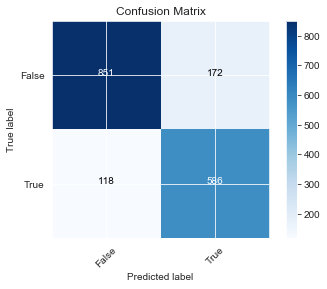

In [176]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()


<h3>AUC Score: 58%</h3>

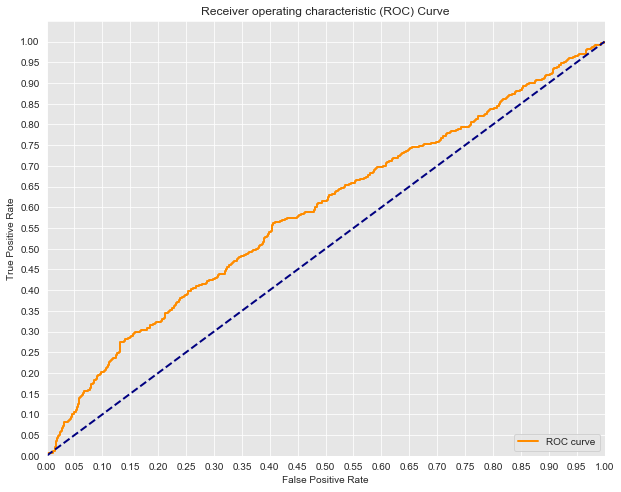

In [177]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


   
   <h3>Accuracy on training set: 99% <br>
   Accuracy on test set: 78%  <br> 
   Mean Cross Validation :78% <br>
   Results: Overfitting <h3>   
  <h3>  

In [178]:
rforest= RandomForestClassifier()
rforest.fit(X_train,y_train)
y_hat_test = rforest.predict(X_test)
print("Training set score:\n{:.2f}".format(rforest.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(rforest.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(rforest,X,y, cv=KFold(n_splits=15, shuffle= True, random_state=0)).mean()))

Training set score:
0.99
Test set score:
0.78
Mean cross-validation score:
0.78


In [179]:
rf_param_grid = {
    'n_estimators': [10, 30, 90],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [2,5,10,15],
    'min_samples_leaf': [1, 2, 5]
}

rf_grid_search = GridSearchCV(rforest, rf_param_grid, cv=3, return_train_score=True)
rf_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 30, 90], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 6, 10], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [180]:
rf_gs_training_score = np.mean(rf_grid_search.cv_results_['mean_train_score'])
rf_gs_testing_score = rf_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(rf_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(rf_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
rf_grid_search.best_params_

Mean Training Score: 75.88%
Mean Testing Score: 96.84%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 30}

<h2> Confusion Matrix <h2>

<h3>
* Confusion Matrix  RF
* Normal 
<h3>

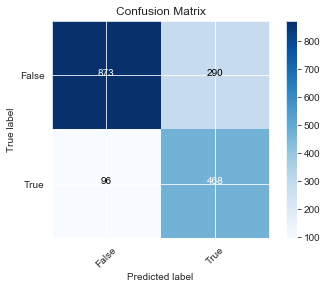

In [181]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)

# print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

<h3><center> Feature Importance</center> <h3>

<h3><center>
Feature importance RG 
</center><h3>

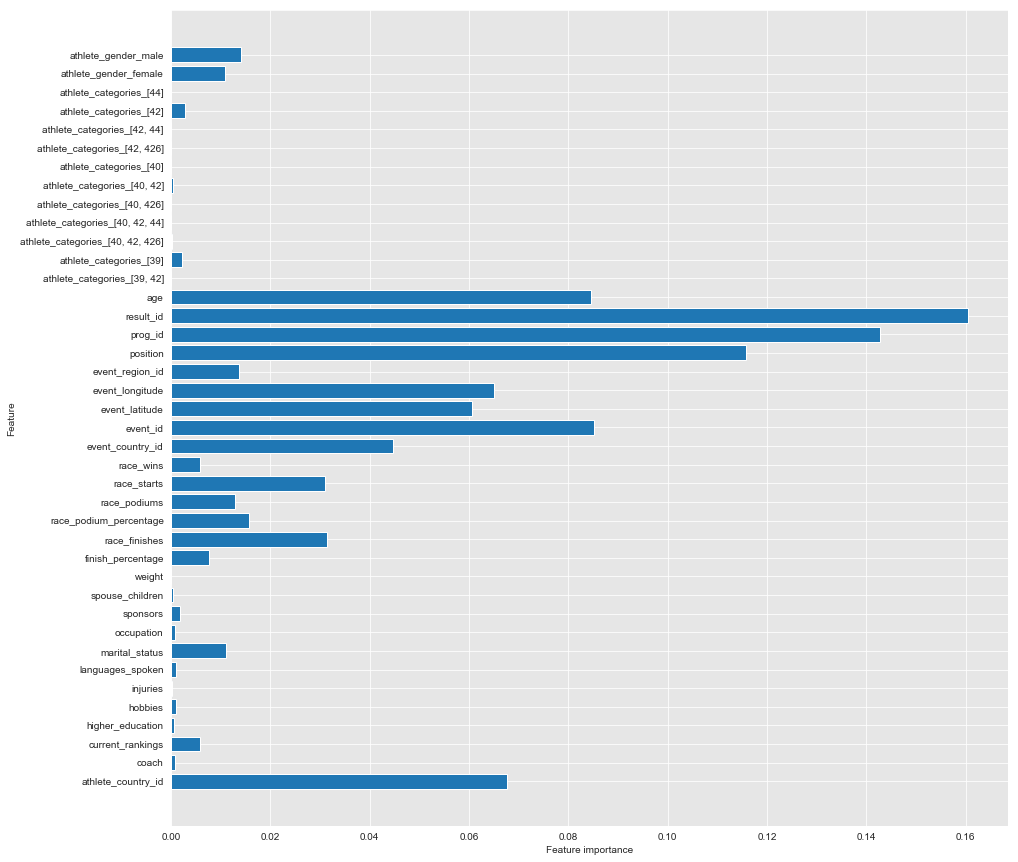

In [182]:
plot_feature_importances(rforest)


<h3> Area Under the Curve <h3>

<h3>Accuracy : 75% <h3>

AUC: 0.7558468186608069


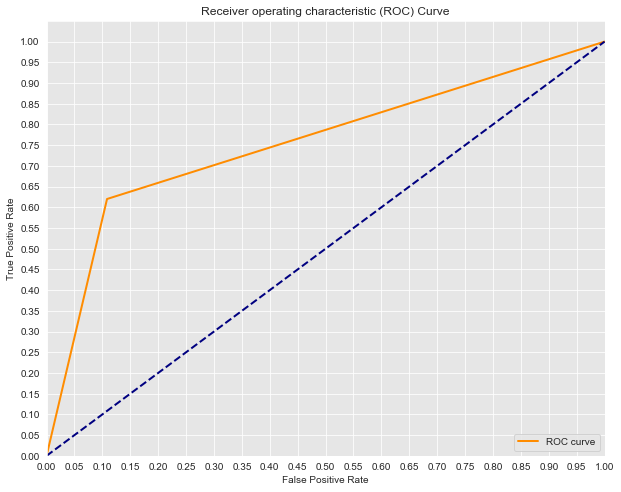

In [183]:
y_score = rforest.fit(X_train, y_train).predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# With Grid Search recommendations


   <h3> 
   Accuracy on training set: 96%<br>
   Accuracy on test set: 79% <br>
   Mean Cross Validation:79%<br>
   Results: Overfitting <br>
   <h3>  

In [184]:
rforest_gs= RandomForestClassifier(criterion= 'gini',max_depth= None,min_samples_leaf= 2,min_samples_split= 5,n_estimators= 30)
rforest_gs.fit(X_train,y_train)
y_hat_test = rforest_gs.predict(X_test)
print("Training set score:\n{:.2f}".format(rforest_gs.score(X_train,y_train)))
print("Test set score:\n{:.2f}".format(rforest_gs.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(rforest_gs,X,y, cv=KFold(n_splits=15, shuffle= True, random_state=0)).mean()))

Training set score:
0.96
Test set score:
0.79
Mean cross-validation score:
0.79


In [185]:
# from sklearn.metrics import confusion_matrix

# cnf_matrix = confusion_matrix( y_hat_test,y_test)

# print('Confusion Matrix:\n',cnf_matrix)

<h3> confusion matrix GS <h3>

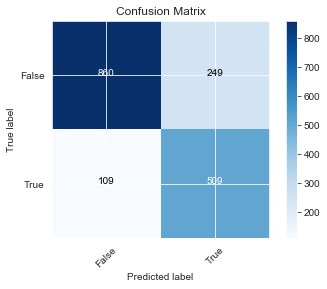

In [186]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)

# print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

<h3> AUC with Grid Search<h3>
Accuracy 77% <h3>

AUC: 0.7769284494800559


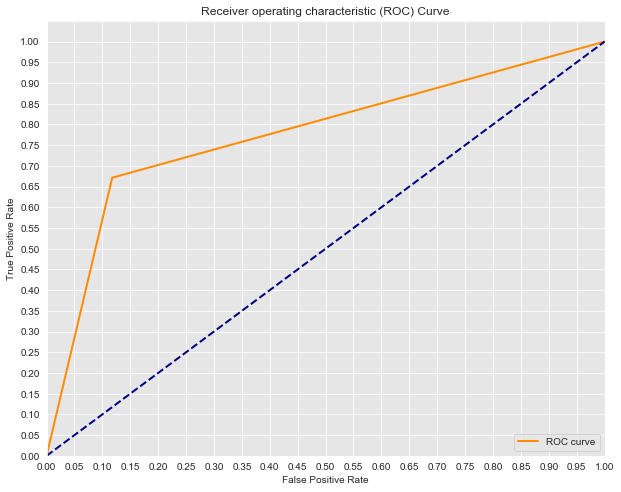

In [187]:
y_score = rforest_gs.fit(X_train, y_train).predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

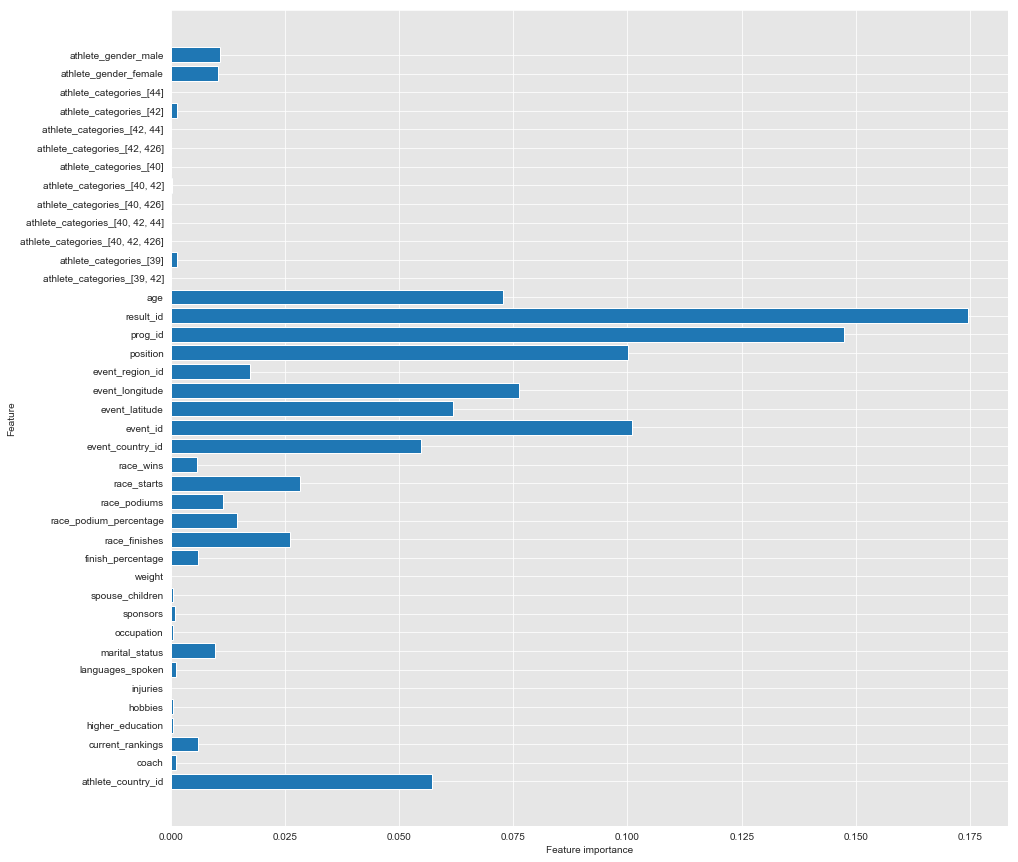

In [188]:
plot_feature_importances(rforest_gs)


# Gradient Boost 


   <h3> 
   * Accuracy on training set: 78%
   * Accuracy on test set: 74% 
   * Mean Cross Validation :72%
 
   <h3> 

In [189]:
grbst= GradientBoostingClassifier()
grbst.fit(X_train,y_train)
y_hat_test = grbst.predict(X_test)
print("Training set score:{:.3f}".format(grbst.score(X_train,y_train)))
print("Test set score:{:.3f}".format(grbst.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(grbst,X,y, cv=kfold).mean()))

Training set score:0.779
Test set score:0.739
Mean cross-validation score:
0.72


In [190]:
#Gradient Boost
gb_param_grid = {'n_estimators': [10,20,30],
                  'learning_rate':[0.001, 0.01,0.1,1],
                  'max_depth': [2,10,20],
                  'min_samples_leaf': range(2, 20, 8),
                  'min_samples_split': range(2, 10, 2),
                  #'max_features': range(1, len(X.columns)+1)
                }

In [191]:
gb_grid_search = GridSearchCV(grbst, gb_param_grid, cv=3, return_train_score=True)
gb_grid_search.fit(X,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': [2, 10, 20], 'min_samples_leaf': range(2, 20, 8), 'min_samples_split': range(2, 10, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [192]:
gb_gs_training_score = np.mean(gb_grid_search.cv_results_['mean_train_score'])
gb_gs_testing_score = gb_grid_search.score(X, y)

print("Mean Training Score: {:.4}%".format(gb_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(gb_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
gb_grid_search.best_params_


Mean Training Score: 74.52%
Mean Testing Score: 100.0%
Best Parameter Combination Found During Grid Search:


{'learning_rate': 1,
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 10}

<h3> Conufison Matrix Gradient Boost <h3>

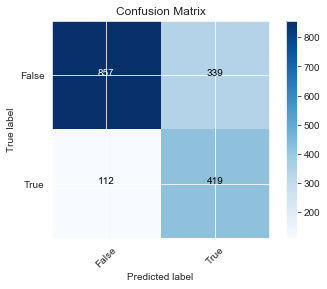

In [193]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

# print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

In [194]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(15,15))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


<h3> gb Feature importance Normal<h3>

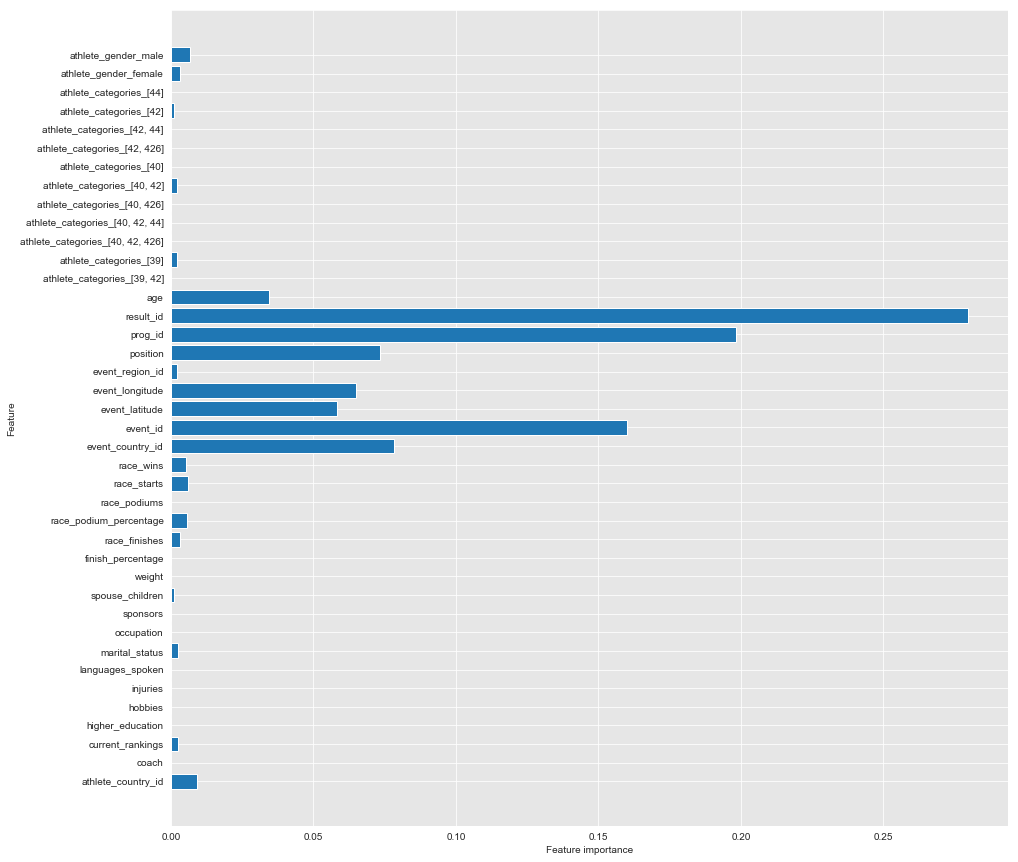

In [195]:
plot_feature_importances(grbst)
# print('GB Normal')

<h3>  Accuracy 71.8%<h3>

AUC: 0.7185936866067075


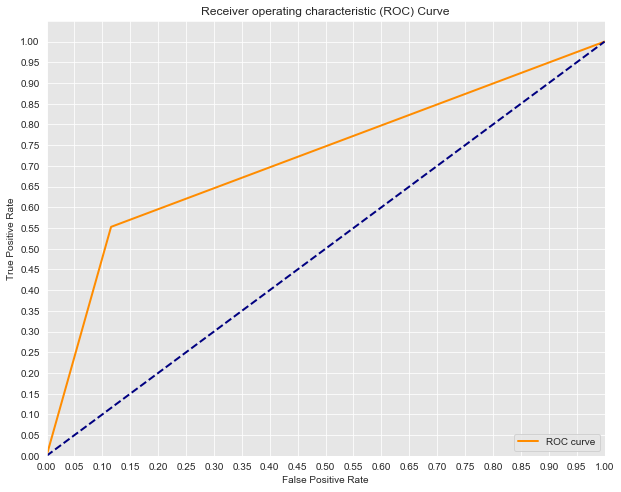

In [196]:
y_score = grbst.fit(X_train, y_train).predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

   <h3> 
   * Accuracy on training set: 99%
   * Accuracy on test set: 83% 
   * Mean Cross Validation :80%
   * Overrfitting 

In [197]:
grbst_gs= GradientBoostingClassifier(learning_rate= 0.1,max_depth=20,min_samples_leaf= 2,min_samples_split= 8,n_estimators= 20)
grbst_gs.fit(X_train,y_train)
y_hat_test = grbst_gs.predict(X_test)
print("Training set score:{:.3f}".format(grbst_gs.score(X_train,y_train)))
print("Test set score:{:.3f}".format(grbst_gs.score(X_test,y_test)))
print("Mean cross-validation score:\n{:.2f}".format(cross_val_score(grbst_gs,X,y, cv=kfold).mean()))

Training set score:0.998
Test set score:0.831
Mean cross-validation score:
0.80


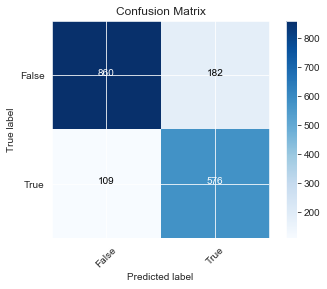

In [198]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

# print('Confusion Matrix:\n',cnf_matrix)
plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

<h3> feature impratance gb gs <h3>

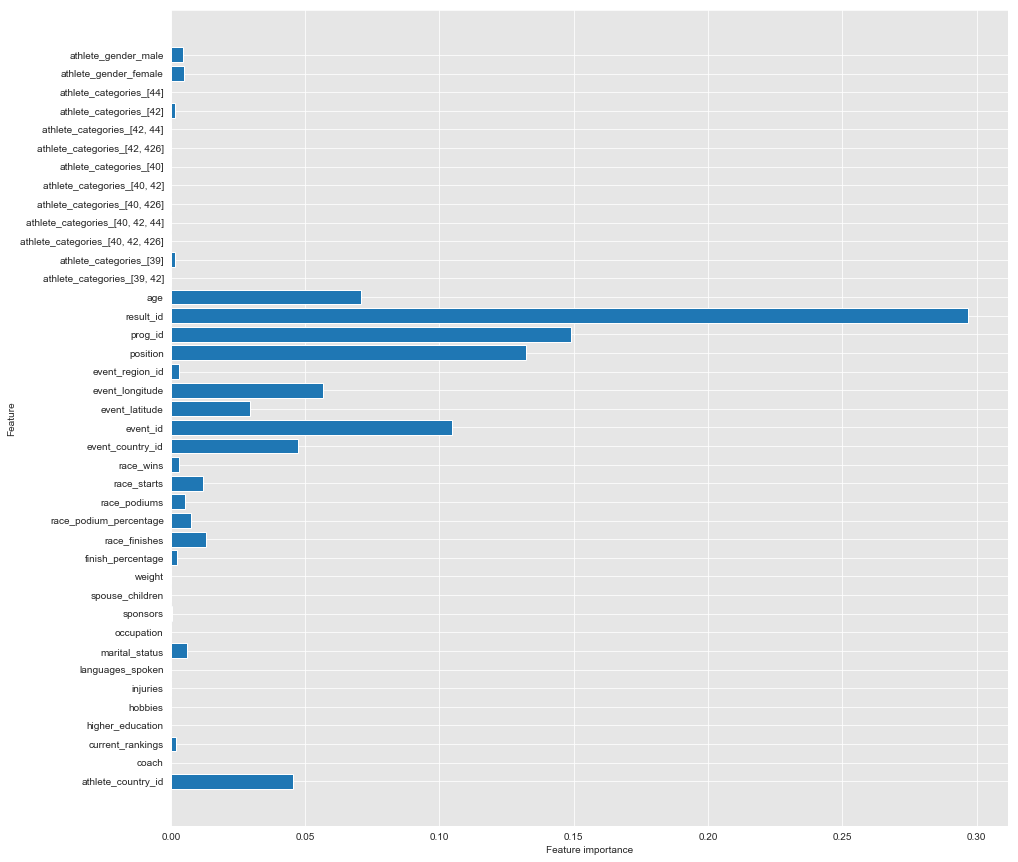

In [199]:
plot_feature_importances(grbst_gs)
# print('gb_gs')